# La ruta al caos de doblamiento de periodo

## Más allá del atractor de periodo 2

En el notebook anterior, vimos que en la familia de mapeos cuadrática $Q_c(x) = x^2+c$ hay *al menos* dos bifurcaciones que ocurren. 

- Para $c>1/4$, no hay puntos fijos en el mapeo, y que para $c<1/4$ hay dos que, para valores de $c$ suficientemente cercanos a $c=1/4$ corresponden a un atractor y a un repulsor. Esta bifurcación es la de silla-nodo.

- Para $c<-3/4$ vimos que el punto fijo atractor se torna repulsor y *aparecen* dos puntos periódicos, de periodo 2, que son atractores. La bifurcación que ocurre en $c=-3/4$ es la que se llama la bifurcación de doblamiento de periodo.

- Además, vimos que para $c<-5/4$ los dos puntos del ciclo de periodo dos se tornan repulsores.

El ejercicio 2 del notebook anterior trataba de explorar los detalles de lo que pasaba en el intervalo $-2\le c<1/4$ de manera íntegra. La razón por la que nos concentramos en el intervalo con $1/4\ge c\ge -2$ es que, en este caso el intervalo de $x$ $I=[-2,2]$ se mapea sobre sí mismo.

Ahora esbozaremos una posible implementación de ese ejercicio. Una sutilezaes que utilizaremos como condición inicial a $x_0=0$. Vale la pena notar que este punto tiene una peculiaridad: $Q_c'(0)=0$ (y $Q_c''(0)\neq 0$). Esto es, $x_0=0$ es un punto crítico de $Q_c(x)$.

In [1]:
"""
    ciclosestables!(xx, f, nit, nout, cc)

Esta función itera el mapeo `f`, de una variable, `nit+nout` veces, 
usando como condición inicial `x0=0`; los últimos `nout` iterados 
actualizan al vector `xx` que tiene longitud `nout`. `cc` es el valor
del parámetro del mapeo `f`. El mapeo `f` debe ser definido de 
tal manera que `f(x0,cc)` tenga sentido. La idea es los últimos 
`nout` iterados reflejen los ciclos estables del mapeo `f`. 
"""
function ciclosestables!(xx, f, nit, nout, cc)
    @assert nit > 0 && nout > 0
    
    # Primeros nit iterados
    x0 = 0.0
    for it = 1:nit
        x0 = f(x0, cc)
    end
    
    # Se guardan los siguientes nout iterados
    for it = 1:nout
        x0 = f(x0, cc)
        @inbounds xx[it] = x0
    end
    
    return nothing
end

ciclosestables! (generic function with 1 method)

In [2]:
"""
    diagbifurc(f, nit, nout, crange)

Itera el mapeo `f` `nit+nout` veces y regresa una matriz
cuya columna `i` tiene los últimos `nout` iterados del mapeo
para el valor del parámetro del mapeo `crange[i]`.

La función `f` debe ser definida de tal manera que `f(x0, c)` 
tenga sentido.
"""
function diagbifurc(f, nit, nout, crange)
    xx = Vector{Float64}(nout)
    ff = Array{Float64,2}(nout, length(crange))
    
    for ic in eachindex(crange)
        c = crange[ic]
        ciclosestables!(xx, f, nit, nout, c)
        ff[:,ic] = xx
    end
    
    return ff
end

diagbifurc (generic function with 1 method)

In [3]:
Qc(x,c) = x^2 + c

crange = 0.25:-1/2^10:-2.0

ff = diagbifurc(Qc, 1000, 256, crange); 
cc = ones(size(ff)[1])*crange';

# Esto cambia las matrices en vectores; ayuda un poco para los dibujos
ff = reshape(ff, size(ff)[1]*size(ff)[2]);
cc = reshape(cc, size(ff));

In [4]:
ff

590080-element Array{Float64,1}:
 0.49901 
 0.499011
 0.499012
 0.499013
 0.499014
 0.499014
 0.499015
 0.499016
 0.499017
 0.499018
 0.499019
 0.49902 
 0.499021
 ⋮       
 2.0     
 2.0     
 2.0     
 2.0     
 2.0     
 2.0     
 2.0     
 2.0     
 2.0     
 2.0     
 2.0     
 2.0     

In [5]:
cc

590080-element Array{Float64,1}:
  0.25
  0.25
  0.25
  0.25
  0.25
  0.25
  0.25
  0.25
  0.25
  0.25
  0.25
  0.25
  0.25
  ⋮   
 -2.0 
 -2.0 
 -2.0 
 -2.0 
 -2.0 
 -2.0 
 -2.0 
 -2.0 
 -2.0 
 -2.0 
 -2.0 
 -2.0 

In [6]:
using PyPlot

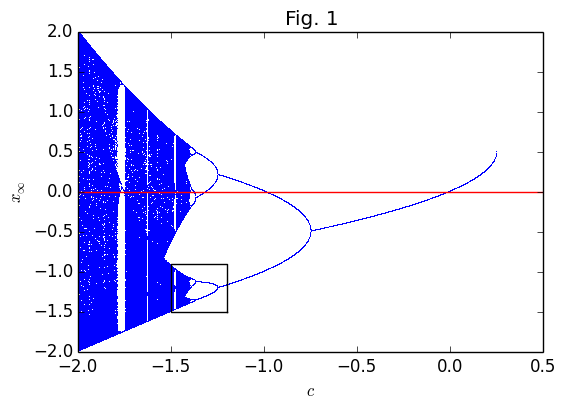

PyObject <matplotlib.text.Text object at 0x320126910>

In [7]:
figure(figsize=(6,4))
plot(cc, ff, "b,")
plot([-1.2,-1.5,-1.5,-1.2,-1.2],[-1.5,-1.5,-0.9,-0.9,-1.5], "k-")
plot([-2,0.5],[0.0,0.0], "r-")
xlabel(L"c")
ylabel(L"x_\infty")
title("Fig. 1")

Es muy claro de este diagrama, Fig. 1, que la dinámica se vuelve rica e interesante a medida que uno disminuye el parámetro $c$ más allá de -5/4.

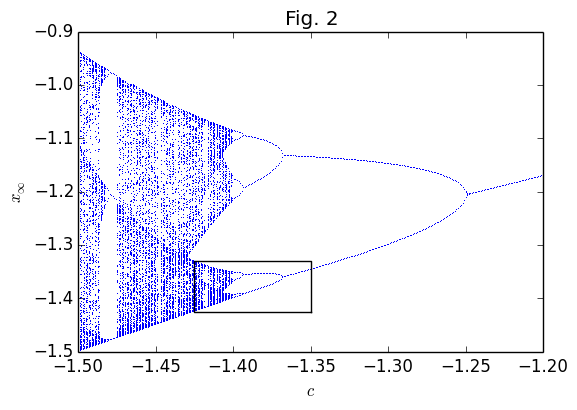

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x321ceb150>

In [8]:
figure(figsize=(6,4))
plot(cc, ff, "b,")
xlabel(L"c")
ylabel(L"x_\infty")
title("Fig. 2")
xlim(-1.5,-1.2)
ylim(-1.5,-0.9)
plot([-1.35,-1.425,-1.425,-1.35,-1.35],
     [-1.425,-1.425,-1.33,-1.33,-1.425], "k-")

La Fig. 2 muestra el aumento indicado en la Fig. 1. Ahí se muestra que después del reescalamiento se obtiene la misma estructura que la gráfica completa. La curva suave de la derecha corresponde en este caso a una de las ramas de periodo 2.

Además, en el intervalo $-1.5\le c \le -1$ podemos ver que en $c=-5/4$ *otra* bifurcación de doblamiento de periodo ocurre. A partir de ese valor, la órbita de periodo 2 se torna en un repulsor y aparece una órbita de periodo 4 atractiva. 

Este escenario se preserva hasta cierto valor de $c$ donde la órbita de periodo 4 se vuelve inestable (repulsiva), y aparece un ciclo de periodo 8. De hecho, la figura muestra que *antes* de $c=-1.4$, aparece un ciclo estable de periodo 16.

Claramente estamos observando una cascada de bifurcaciones de doblamiento de periodo. Esto es, al disminuir $c$ 
los puntos periódicos aparecen en el orden: $1, 2, 4, 8, \dots, 2^n, \dots$. Además, los intervalos en $c$ donde el periodo $2^n$ se observa, son mayores que donde se observa el periodo $2^{n+1}$.

Aumentos sucesivos muestran la veracidad de esto, aunque para tener suficientes puntos hay que hacer nuevos cálculos. En la Fig. 3, que corresponde al recuadro indicado en la Fig. 2, la curva de la derecha corresponde a una de las ramas del ciclo de periodo 4.

In [9]:
crange = -1.35:-1/2^13:-1.425

ff1 = diagbifurc(Qc, 1200, 512, crange); 
cc1 = ones(size(ff1)[1])*crange';

ff1 = reshape(ff1, size(ff1)[1]*size(ff1)[2]);
cc1 = reshape(cc1, size(ff1));

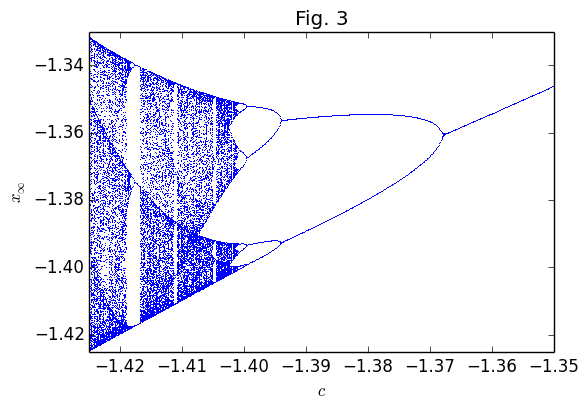

(-1.425,-1.33)

In [10]:
figure(figsize=(6,4))
plot(cc1, ff1, "b,")
xlabel(L"c")
ylabel(L"x_\infty")
title("Fig. 3")
xlim(-1.425,-1.35)
ylim(-1.425,-1.33)

En estas figuras uno puede observar ciertas regiones donde, en algún sentido, aparecen (nuevamente) ventanas de baja periodicidad, pero cuyo periodo **no** es de la forma $2^n$, aunque está seguido de otra casada de bifurcaciones de doblamiento de periodo. Un ejemplo notable es la ventana de *periodo 3*. Como veremos más adelante, la existencia de periodo 3 implica caos.

La observación de que los intervalos en $c$ donde se observa cierta periodicidad *disminuyen* al aumentar la periodicidad (respetando el doblamiento de periodo), lleva a la pregunta si hay una $c$ donde se observe un periodo *infinito*.

## Tarea 4

**Ejercicio 1:**

Llamemos $c_n$ el valor del parámetro $c$ donde ocurre la bifurcación de doblamiento de periodo para el mapeo $Q_c(x)$, donde la órbita de periodo $2^n$ nace. Es decir, tenemos que $c_0=1/4$ marca la aparición del atractor de periodo $2^0=1$, $c_1=-1/4$ corresponde a la aparición del atractor de periodo $2^1=2$, $c_2=-3/4$ a la aparición del atractor de periodo $2^2=4$, etc. 

A partir de estos valores y otros que calcularán (al menos deben encontrar $c_6$), definimos la secuencia: $\{f_0, f_1, f_2, \dots\}$, donde

\begin{equation}
f_n = \frac{c_n-c_{n+1}}{c_{n+1}-c_{n+2}} .
\end{equation}

La pregunta es, ¿a qué valor converge esta secuencia?, es decir, dar una estimación de $f_\infty$.

*Hint:* Para realizar este ejercicio deben calcular el atractor para varias valores de $c$, de tal manera que puedan aislar las órbitas de periodo $2^p$ y de ahí determinar varios valores $c_n$. Sin embargo, van a requerir suficiente cuidado para obtener una buena aproximación de $c_n$. 

Una opción, que tiene ciertos inconvenientes numéricos que también ciertas ventajas se basa en recordar/usar que las bifurcaciones de doblamiento de periodo ocurren cuando los puntos de la órbita de periodo $p$ se tornan en repulsores, es decir, $(Q_c^p)'(x)=-1$. Esta opción, entonces, involucra obtener los valores $c_n$ usando los polinomios $Q_c^p(x)$ y diferenciación automática.

In [11]:
using DualNumbers

In [12]:
a_dual = Dual(1, 1)

1 + 1ɛ

In [13]:
dualpart(Qc(a_dual, 0))

2

In [14]:
Qc(x,c) = x^2 + c

crange = 0.25:-1/2^10:-2.0

ff = diagbifurc(Qc, 1000, 256, crange); 
cc = ones(size(ff)[1])*crange';

cc

256x2305 Array{Float64,2}:
 0.25  0.249023  0.248047  0.24707  …  -1.99707  -1.99805  -1.99902  -2.0
 0.25  0.249023  0.248047  0.24707     -1.99707  -1.99805  -1.99902  -2.0
 0.25  0.249023  0.248047  0.24707     -1.99707  -1.99805  -1.99902  -2.0
 0.25  0.249023  0.248047  0.24707     -1.99707  -1.99805  -1.99902  -2.0
 0.25  0.249023  0.248047  0.24707     -1.99707  -1.99805  -1.99902  -2.0
 0.25  0.249023  0.248047  0.24707  …  -1.99707  -1.99805  -1.99902  -2.0
 0.25  0.249023  0.248047  0.24707     -1.99707  -1.99805  -1.99902  -2.0
 0.25  0.249023  0.248047  0.24707     -1.99707  -1.99805  -1.99902  -2.0
 0.25  0.249023  0.248047  0.24707     -1.99707  -1.99805  -1.99902  -2.0
 0.25  0.249023  0.248047  0.24707     -1.99707  -1.99805  -1.99902  -2.0
 0.25  0.249023  0.248047  0.24707  …  -1.99707  -1.99805  -1.99902  -2.0
 0.25  0.249023  0.248047  0.24707     -1.99707  -1.99805  -1.99902  -2.0
 0.25  0.249023  0.248047  0.24707     -1.99707  -1.99805  -1.99902  -2.0
 ⋮         

In [15]:
length(cc[1,:])

2305

In [16]:
for i in 1:length(ff[1,:])
    
    a_dual = Dual(ff[end, i], ff[end, i])
    
    der_eval = dualpart(Qc(a_dual, cc[1, i]))
    
    if 2*abs(der_eval) > 1 
        
        return cc[1, i]
        break
        
    end
    
end

-1.4306640625

**Ejercicio 2:**

Repitan el ejercicio anterior para el mapeo $S_c(x) = c \sin(x)$. ¿Cómo se comparan los valores obtenidos de $f_n$?

**Ejercicio 3:**

Como se ve en la Fig. 1, $x=0$ pertenece a un ciclo de periodo $2^n$ para ciertos valores $C_n$ del parámetro. Dichos valores son *especiales*, ya que $x=0$ esté en el ciclo de periodo $2^n$ marca los llamados *ciclos superestable*, donde tenemos $(Q^{2^p}_{C_n})'(0)=0$.

¿A qué converge la secuencia $f_n$, definida ahora con los valores $C_n$.

De los $2^p$ puntos del ciclo de periodo $2^p$, es decir, $\{0, p_1, \dots p_{2^{n-1}}\,\}$ hay uno (distinto del 0) cuya distancia a 0 es menor; a ese punto lo identificamos como $d_n$. Calcular numéricamente a dónde converge la secuencia $d_n/d_{n+1}$.

### Notas después de las observaciones de Luis

In [97]:
function find_bifurcation(ff, cc)     

    Derivadas = []
    
    for i in 1:length(ff[1,:])

        a_dual = Dual(ff[1, i], ff[1, i])
        b_dual = Dual(ff[2, i], ff[2, i])

        der_eval_a = dualpart(Qc(a_dual, cc[1, i]))
        der_eval_b = dualpart(Qc(b_dual, cc[1, i]))

        a = [abs(der_eval_a) , abs(der_eval_a * der_eval_b)]
        push!(Derivadas, a)
       
    end
    
    Derivadas
end

find_bifurcation (generic function with 1 method)

In [101]:
function cuenta_bif(A)

    bif = 0
    
    for i in 1:length(A)


        if abs(A[i][1]) > 1 #&& abs(A[i][1] * A[i][2]) < 1

            bif +=1

        end

    end
    
    return bif
end

cuenta_bif (generic function with 1 method)

In [102]:
Qc(x,c) = x^2 + c

crange = 0.25:-1/2^10:-1.0

ff = diagbifurc(Qc, 10000, 2, crange); 
cc = ones(size(ff)[1])*crange';

In [104]:
V = find_bifurcation(ff, cc)

1281-element Array{Any,1}:
 [0.49980025925512195,0.24980030912159396]  
 [0.43945312499999895,0.1931190490722647]   
 [0.4155179023516807,0.17265512717474085]   
 [0.3976061995269445,0.15809068990226038]   
 [0.3828124999999996,0.1465454101562497]    
 [0.37001137640626275,0.13690841867005704]  
 [0.35862564107605094,0.1286123504372085]   
 [0.34831241805846275,0.12132154057373333]  
 [0.33884830470336286,0.11481817360034303]  
 [0.33007812499999983,0.10895156860351551]  
 [0.321888896239476,0.10361246152226813]    
 [0.31419532560278723,0.09871870263064149]  
 [0.30693114905389,0.09420673025954125]     
 ⋮                                          
 [1.956795365156158,0.00046157836914062294] 
 [1.9607429463348827,0.0003814697265624984] 
 [1.9646864778438569,0.0003089904785156276] 
 [1.9686259842514764,0.00024414062499999962]
 [1.9725614898787187,0.00018692016601562617]
 [1.9764930188026186,0.00013732910156249797]
 [1.9804205948596787,9.536743164062543e-5]  
 [1.9843442416492214,6.10351

In [74]:
cuenta_bif(V)

0

In [29]:
function prueba(i)
    
    a_dual = Dual(ff[end, i], ff[end, i])
    b_dual = Dual(ff[end-1, i], ff[end-1, i])

    der_eval_a = dualpart(Qc(a_dual, cc[1, i]))
    der_eval_b = dualpart(Qc(b_dual, cc[1, i]))

    return abs(der_eval_a) , abs(der_eval_a * der_eval_b)

end

prueba (generic function with 1 method)

In [30]:
prueba(1)

(0.49842011028476657,0.24842198331044238)

In [24]:
nombre(n::Int) = symbol( string("F_", n) )

nombre (generic function with 1 method)

In [25]:
nombre(3)

:F_3

In [ ]:
function itera_func(n::Int)
    # Checo que `n` sea >= 1
    @assert n ≥ 1   # ≥ se obtiene con \ge<TAB>
    
    ex = :(x^2-1)
    for i = 2:n
        ex = :( ($ex) * ( x-$i) )
    end
    ex_ret = :( $(nombre(n))(x) = $ex )
    ex_ret
end